## Import Seaborn and MPG Dataset

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Create a visual showing the relationship between horsepower and fuel economy.
##### *Fig. 1*

Text(0, 0.5, 'Miles Per Gallon (MPG)')

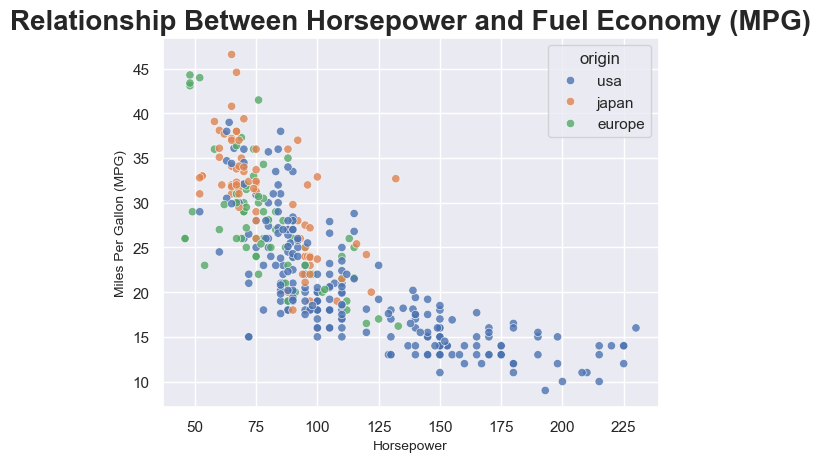

In [14]:
# Apply the default theme
sns.set_theme()

# Created a visualization using a scatterplot
sns.scatterplot(
    data=mpg,
    x="horsepower", y="mpg",
    hue="origin",  # Color by car origin
    palette="deep",  # Use a deeper color palette
    alpha=0.8  # Set transparency to avoid overplotting
)

# Added a title and labels
plt.title('Relationship Between Horsepower and Fuel Economy (MPG)',font='Arial',fontsize=20,fontweight='bold')
plt.xlabel('Horsepower',font='Arial',fontsize=10)
plt.ylabel('Miles Per Gallon (MPG)',font='Arial',fontsize=10)

##### *Fig. 2*

Text(0, 0.5, 'Miles Per Gallon (MPG)')

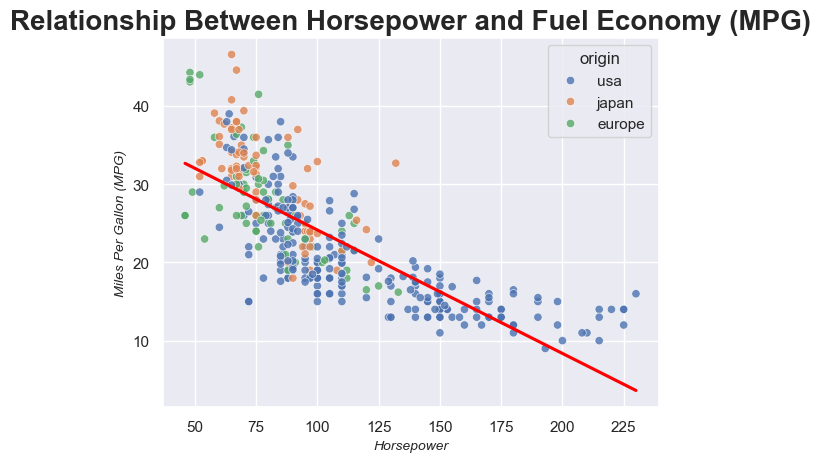

In [17]:
# Apply the default theme
sns.set_theme()

# Created a visualization using a scatterplot
sns.scatterplot(
    data=mpg,
    x="horsepower", y="mpg",
    hue="origin",  # Color by car origin
    palette="deep",  # Use a deeper color palette
    alpha=0.8  # Set transparency to avoid overplotting
)

# Added a regression line for better understanding of the relationship
sns.regplot(
    data=mpg,
    x="horsepower", y="mpg",
    scatter=False,  # Do not add points again
    color="red",  # Color of the regression line
    ci=None  # Do not display confidence interval
)

# Added a title and labels
plt.title('Relationship Between Horsepower and Fuel Economy (MPG)',font='Arial',fontsize=20,fontweight='bold')
plt.xlabel('Horsepower',font='Arial',fontsize=10,style='italic')
plt.ylabel('Miles Per Gallon (MPG)',font='Arial',fontsize=10,style='italic')

## Create a table summarizing fuel economy by country of origin.

In [20]:
# Group by 'origin' and calculate summary statistics for 'mpg'
table1 = mpg.groupby('origin')['mpg'].agg(
    Mean_MPG = 'mean',
    Median_MPG = 'median',
    Min_MPG = 'min',
    Max_MPG = 'max',
    Std_Dev ='std',
    Num_Vehicles ='count'
).reset_index() # Helps maintain a clean look

# Calculate 25%,50% and 75% percentiles
table1['25%'] = table1['Mean_MPG'] * 0.75
table1['50%'] = table1['Mean_MPG']
table1['75%'] = table1['Mean_MPG'] * 1.25

In [22]:
table1

,origin,Mean_MPG,Median_MPG,Min_MPG,Max_MPG,Std_Dev,Num_Vehicles,25%,50%,75%
0,europe,27.891429,26.5,16.2,44.3,6.723930,70,20.918571,27.891429,34.864286
1,japan,30.450633,31.6,18.0,46.6,6.090048,79,22.837975,30.450633,38.063291
2,usa,20.083534,18.5,9.0,39.0,6.402892,249,15.062651,20.083534,25.104418


##### *Table is styled highlighting the 'min' and 'max' values*

In [25]:
# Styling the table using colors; excluding the origin column
style = table1.style \
    .background_gradient(cmap='Oranges',subset=['Mean_MPG','Median_MPG',
                                                'Min_MPG','Max_MPG','Std_Dev',
                                                'Num_Vehicles','25%','75%'],
                                                 axis=0)\
    .set_caption("Fuel Economy by Country of Origin")

# Show table
style

,origin,Mean_MPG,Median_MPG,Min_MPG,Max_MPG,Std_Dev,Num_Vehicles,25%,50%,75%
0,europe,27.891429,26.500000,16.200000,44.300000,6.723930,70,20.918571,27.891429,34.864286
1,japan,30.450633,31.600000,18.000000,46.600000,6.090048,79,22.837975,30.450633,38.063291
2,usa,20.083534,18.500000,9.000000,39.000000,6.402892,249,15.062651,20.083534,25.104418


## Create a visual showing how fuel economy has changed over time.

In [28]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [30]:
# Group by 'model_year' and calculate average mpg per year
avgMPG_year = mpg.groupby('model_year')['mpg'].mean().reset_index()

Text(0, 0.5, 'Miles Per Gallon (MPG)')

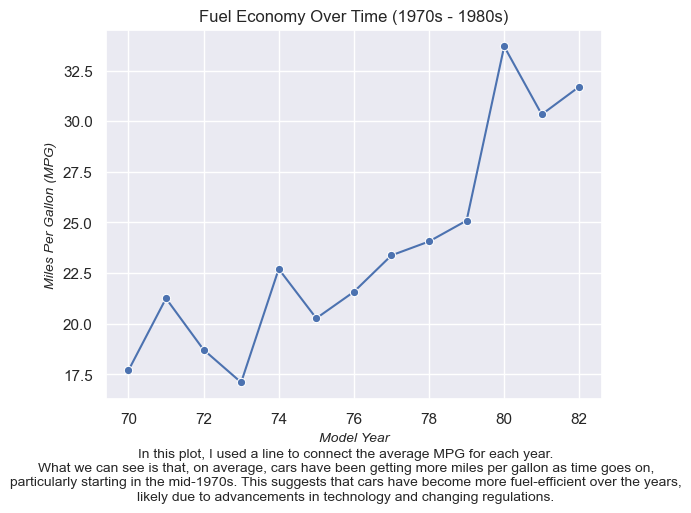

In [32]:
# Line plot showing changes in MPG over the years
sns.lineplot(data=avgMPG_year,x='model_year',y='mpg',marker='o')

# Summary/explanation underneath the line plot
plt.figtext(0.5, -0.1, "In this plot, I used a line to connect the average MPG for each year.\n"
                "What we can see is that, on average, cars have been getting more miles per gallon as time goes on,\n"
                "particularly starting in the mid-1970s. This suggests that cars have become more fuel-efficient over the years,\n" 
                "likely due to advancements in technology and changing regulations.",
                 horizontalalignment='center', fontsize=10, font='Arial')

# Styling the visual
plt.style.use('seaborn-v0_8-notebook')

# Adding titles and labels
plt.title('Fuel Economy Over Time (1970s - 1980s)', fontsize=18, fontweight='bold', font='Arial')
plt.xlabel('Model Year', fontsize=10, font='Arial', style='italic')
plt.ylabel('Miles Per Gallon (MPG)', fontsize=10, font='Arial', style='italic')

Text(0, 0.5, 'Miles Per Gallon (MPG)')

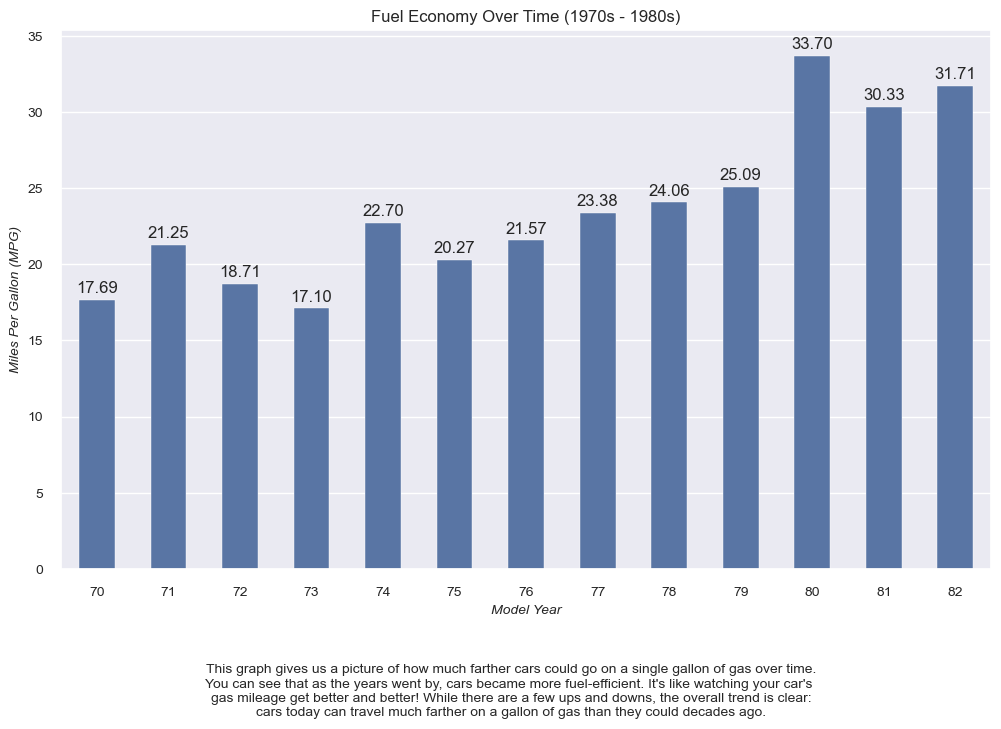

In [41]:
# Adjusted the figure size
plt.figure(figsize=(12, 7))

# Bar plot showing MPG changes over time
avgMPG = sns.barplot(data=avgMPG_year, x="model_year", y="mpg", width=0.5)
avgMPG.bar_label(avgMPG.containers[0], fmt='%.2f', padding=3)

# Summary/explanation underneath the bar plot
plt.figtext(0.5, -0.1, "This graph gives us a picture of how much farther cars could go on a single gallon of gas over time.\n"
                    "You can see that as the years went by, cars became more fuel-efficient. It's like watching your car's \n"
                    "gas mileage get better and better! While there are a few ups and downs, the overall trend is clear:\n"
                    "cars today can travel much farther on a gallon of gas than they could decades ago.",
                 horizontalalignment='center', fontsize=10, font='Arial')

# Styling the visual
plt.style.use('seaborn-v0_8-notebook')

# Adding title and labels
plt.title('Fuel Economy Over Time (1970s - 1980s)', fontsize=18, fontweight='bold', font='Arial')
plt.xlabel('Model Year', fontsize=10, font='Arial', style='italic')
plt.ylabel('Miles Per Gallon (MPG)', fontsize=10, font='Arial', style='italic')

## Create two other visuals or tables related to fuel economy.

## Comments